# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
df.describe()

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


In [4]:
media = df['Preco_Normal'].mean()  #Seu código aqui para a média
mediana = df['Preco_Normal'].median()  #Seu código aqui para a mediana

print('\n Média do preço normal:', media)
print('\n Mediana do preço normal:', mediana)


 Média do preço normal: 2070.9972899728996

 Mediana do preço normal: 1269.0


In [5]:
#Comparação da média e da mediana dos preços - coluna Preco_Normal - por categoria de produto.
media_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().rename(columns={'Preco_Normal': 'Media'}).sort_values(by='Media', ascending=False)

mediana_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().rename(columns={'Preco_Normal': 'Mediana'}).sort_values(by='Mediana', ascending=False)

comparacao = media_categoria.merge(mediana_categoria, on = 'Categoria')
print(comparacao, '\n')

#Identificação das categorias que parecem ter um valor de média abaixo ou acima da mediana.
acima = comparacao.query('Media > Mediana').sort_values('Media', ascending = False)
abaixo = comparacao.query('Media < Mediana').sort_values('Media', ascending = False)
iguais = comparacao.query('Media == Mediana')

print('\n Categorias com valor de média abaixo da mediana:\n', abaixo)
print('\n Categorias com valor da média acima da mediana:\n', acima)
print('\n Categorias com valor da média e mediana iguais:\n', iguais)

                    Categoria        Media  Mediana
0          comidas-preparadas  3095.043478   3290.0
1                     lacteos  2385.219239    989.0
2                  congelados  2108.042553   1519.0
3  belleza-y-cuidado-personal  1783.556485   1569.0
4                      frutas  1724.473684   1195.0
5                    verduras  1343.296875   1180.0
6        instantaneos-y-sopas   765.491228    439.0 


 Categorias com valor de média abaixo da mediana:
             Categoria        Media  Mediana
0  comidas-preparadas  3095.043478   3290.0

 Categorias com valor da média acima da mediana:
                     Categoria        Media  Mediana
1                     lacteos  2385.219239    989.0
2                  congelados  2108.042553   1519.0
3  belleza-y-cuidado-personal  1783.556485   1569.0
4                      frutas  1724.473684   1195.0
5                    verduras  1343.296875   1180.0
6        instantaneos-y-sopas   765.491228    439.0

 Categorias com valor da m

Digite aqui as categorias:
* Categorias com valor de média abaixo da mediana: comidas-preparadas.
* Categorias com valor da media acima da mediana: lacteos, congelados, belleza-y-cuidado-personal, frutas, verduras, instantaneos-y-sopas.

-------

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [6]:
#Seu código aqui
desvio_padrao_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
desvio_padrao_categoria
print(desvio_padrao_categoria)

maiores_valores = desvio_padrao_categoria.head(2)  #As duas categorias com maior desvio padrão
menores_valores = desvio_padrao_categoria.tail(2)  #As duas categorias com menor desvio padrão

print('\n Mairoes valores no desvio padrão:\n', maiores_valores)
print('\n Menores valores no desvio padrão:\n', menores_valores)

                    Categoria  Preco_Normal
5                     lacteos   3925.816164
0  belleza-y-cuidado-personal   2210.041719
2                  congelados   2111.539896
1          comidas-preparadas   2019.911428
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
6                    verduras   1012.699625

 Mairoes valores no desvio padrão:
                     Categoria  Preco_Normal
5                     lacteos   3925.816164
0  belleza-y-cuidado-personal   2210.041719

 Menores valores no desvio padrão:
               Categoria  Preco_Normal
4  instantaneos-y-sopas   1170.232869
6              verduras   1012.699625


In [7]:
media_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().rename(columns={'Preco_Normal': 'Media'}).sort_values(by='Media', ascending=False)

mediana_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().rename(columns={'Preco_Normal': 'Mediana'}).sort_values(by='Mediana', ascending=False)

comparacao = media_categoria.merge(mediana_categoria, on = 'Categoria')
print(comparacao, '\n')

                    Categoria        Media  Mediana
0          comidas-preparadas  3095.043478   3290.0
1                     lacteos  2385.219239    989.0
2                  congelados  2108.042553   1519.0
3  belleza-y-cuidado-personal  1783.556485   1569.0
4                      frutas  1724.473684   1195.0
5                    verduras  1343.296875   1180.0
6        instantaneos-y-sopas   765.491228    439.0 



Digite nesse campo o comportamento que você identificou.

* Maior valor no desvio padrão: lacteos. | Os laticínios possuem o maior valor no desvio padrão e também apresentam uma média alta, enquanto a mediana é baixa.


* Menor valor no desvio padrão: verduras. | As verduras possuem o menor valor no desvio padrão e também apresentam valores baixos tanto na média quanto na mediana.

-------

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

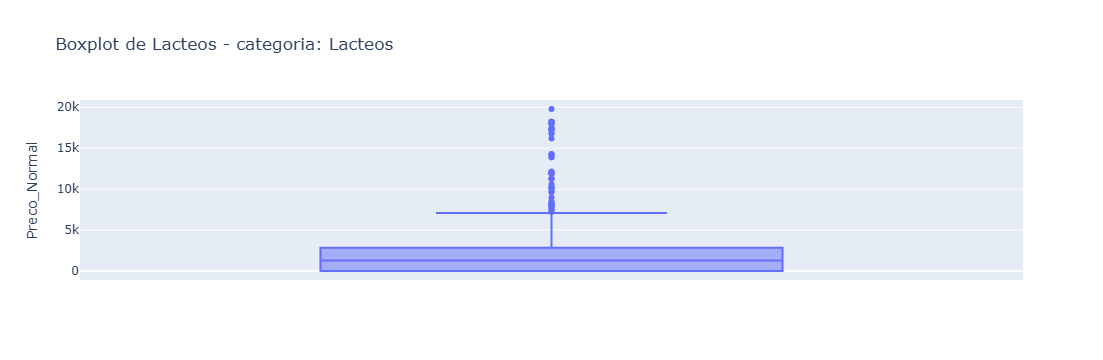

In [8]:
#Seu código aqui
#boxplot da distribuição do Preco_Normal para a categoria que foi identificada que tem o maior desvio padrão
df_Lacteos = df.loc[df['Categoria'] == 'Lacteos']

# Criando o boxplot de Lacteos
fig = px.box(df, y = 'Preco_Normal', title = 'Boxplot de Lacteos - categoria: Lacteos')

# Exibindo o gráfico
fig.show()

* Outliers pelo Z-score: Índices: 53 a 60 | Quantidade: 8 linhas
* Há uma quantidade consideravel de outliers.

* Pode-se observar que o desvio padrão por categoria aumenta à medida que o preço médio também aumenta.

In [9]:
import numpy as np
from scipy import stats

In [10]:
# Identificar outliers com Z-score
z_score = stats.zscore(df['Preco_Normal'].dropna())
mask = np.abs(z_score) >= 3
outliers_z = df.loc[df['Preco_Normal'].dropna().index[mask]]
print('\n Outilers pelo Z-score: \n', outliers_z)


 Outilers pelo Z-score: 
                                                 title         Marca  \
0                Pack 12 un, Leche extra proteína 1 L    Loncoleche   
1     Pack 12 un, Leche chocolate receta original 1 L       Soprole   
2      Pack 12 un, Leche semidescremada chocolate 1 L       Soprole   
3       Pack 12 un, Leche semidescremada frutilla 1 L       Soprole   
4         Pack 12 un, Leche sin lactosa chocolate 1 L    Loncoleche   
5          Pack 12 un, Leche sin lactosa frutilla 1 L    Loncoleche   
6    Pack 12 un, Leche saborizada light chocolate 1 L    Loncoleche   
7           Pack 12 un, Leche saborizada frutilla 1 L         Colun   
8           Pack 12 un, Leche saborizada vainilla 1 L         Colun   
9             Pack 12 un, Leche saborizada manjar 1 L         Colun   
10           Pack 12 un, Leche saborizada plátano 1 L    Loncoleche   
11         Pack 12 un, Leche saborizada chocolate 1 L    Loncoleche   
12                    Pack 12 un, Leche chocolate 

-------

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

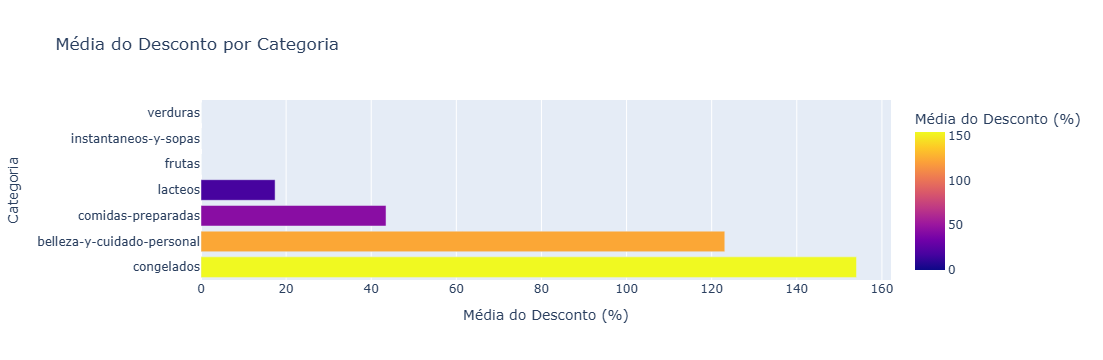

In [11]:
# Seu código aqui
preco_categoria = (df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False))

#Gráfico de barras horizontais
fig = px.bar(preco_categoria, x = 'Desconto', y = 'Categoria', orientation = 'h',
            title = 'Média do Desconto por Categoria',
            labels = {'Categoria': 'Categoria', 'Desconto': 'Média do Desconto (%)'},
            color = 'Desconto',
            width = 800)

fig.update_layout(
    xaxis_title = "Média do Desconto (%)",
    yaxis_title = "Categoria",
    xaxis_tickangle = 0
)

fig.show()

------

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

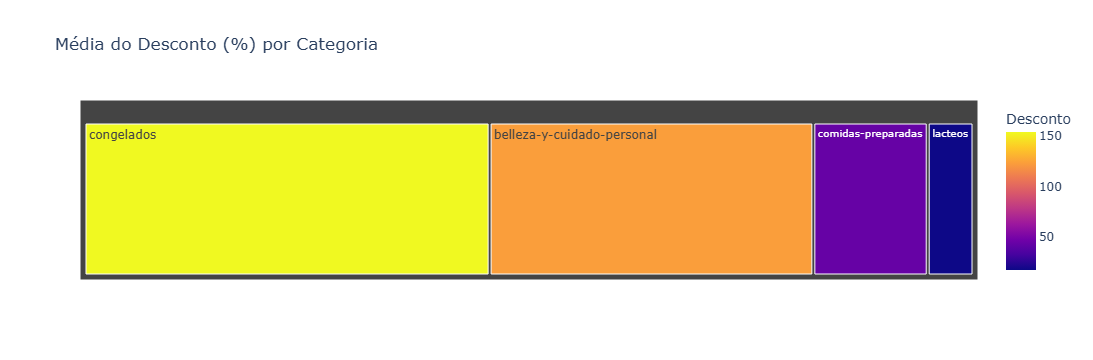

In [12]:
# Seu código aqui
# Agrupando os dados do DataFrame por Categoria e calculando a média do Desconto
preco_categoria = (df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False))

#Gráfico de barras horizontais
fig = px.bar(preco_categoria, x = 'Categoria', y = 'Desconto',
            title = 'Média do Desconto por Categoria',
            labels = {'Categoria': 'Categoria', 'Desconto': 'Média do Desconto (%)'},
            color = 'Desconto',
            width = 1150)

fig = px.treemap(preco_categoria,
                 path=['Categoria'],  # hierarquia
                 values='Desconto',
                 color='Desconto',
                 title='Média do Desconto (%) por Categoria')

fig.show()

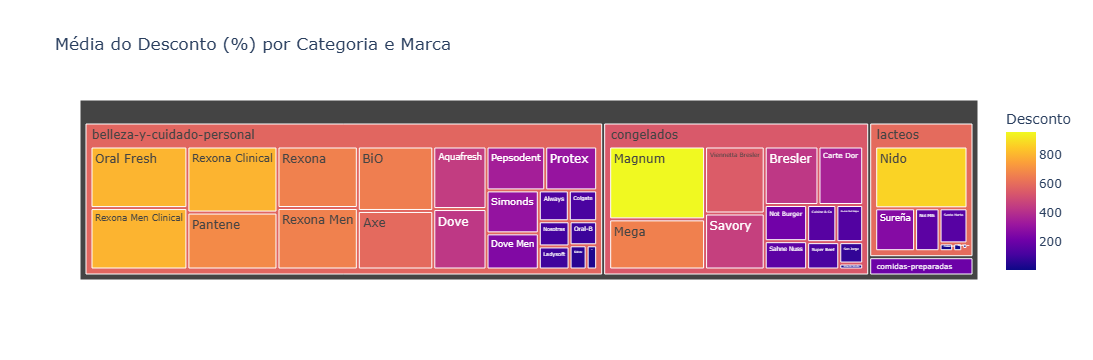

In [13]:
# Agrupando os dados do DataFrame por Categoria e Marca e calculando a média do Desconto
preco_categoria_marca = (df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False))

#Gráfico de barras horizontais
fig = px.bar(preco_categoria, x = 'Categoria', y = 'Desconto',
            title = 'Média do Desconto (%) por Categoria e Marca',
            labels = {'Categoria': 'Categoria', 'Desconto': 'Média do Desconto (%)'},
            color = 'Desconto',
            width = 1200)

fig = px.treemap(preco_categoria_marca, path=['Categoria', 'Marca'], values='Desconto', color='Desconto', title='Média do Desconto (%) por Categoria e Marca')

fig.show()


-----------